# Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


#Шаблон ноутбука

In [1]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [2]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных

In [3]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [15]:
# ваше решение
model = Sequential() # Последовательная модель нейронной сети

model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,993 (27.32 KB)

 Trainable params: 6,993 (27.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4291 - loss: 4.6947 - val_accuracy: 0.2500 - val_loss: 1.0990
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3053 - loss: 1.0986 - val_accuracy: 0.2500 - val_loss: 1.0992
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3417 - loss: 1.0980 - val_accuracy: 0.2500 - val_loss: 1.0994
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3309 - loss: 1.0929 - val_accuracy: 0.2500 - val_loss: 1.1312
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4349 - loss: 1.1448 - val_accuracy: 0.5000 - val_loss: 1.0223
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5629 - loss: 0.9725 - val_accuracy: 0.5625 - val_loss: 0.9875
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6008 - loss: 0.9361 - val_accuracy: 0.5000 - val_loss: 0.8878
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6133 - loss: 0.8919 - val_accuracy: 0.6250 - val_loss

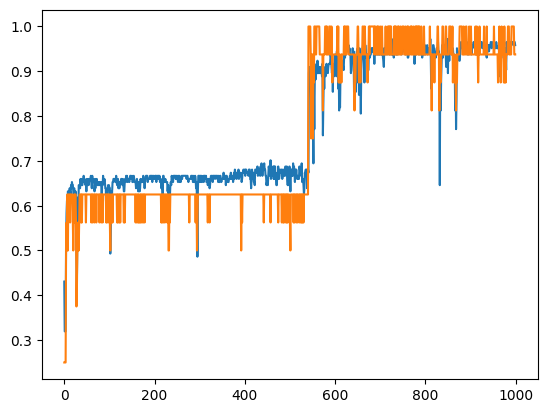

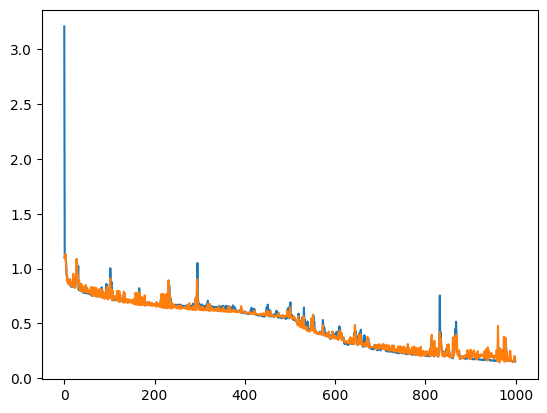

In [16]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 1000,
                    batch_size = 32)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [17]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9444 - loss: 0.1913


[0.19133862853050232, 0.9444444179534912]

In [18]:
# Предсказание модели
predictions = np.argmax(model.predict(x_test), axis=1)
y_test_nums = np.argmax(y_test, axis=1)

# Вывод результатов тестирования
for i in range(len(x_test)):
    print(f'Предсказано - {predictions[i]}, было {y_test_nums[i]}, {predictions[i] == y_test_nums[i]}')
print(f'\n Процент верных предсказаний - {(predictions == y_test_nums).mean()*100} %')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 1, было 1, True
Предсказано - 2, было 2, True
Предсказано - 1, было 0, False
Предсказано - 1, было 1, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True
Предсказано - 0, было 0, True

 Процент верных предсказаний - 94.44444444444444 %
